In [3]:
import pandas as pd
import numpy as np

In [6]:
data_train = pd.read_csv("/content/trainset.csv")

In [7]:
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [8]:
data_train.shape


(1259, 7)

In [9]:
training_set = data_train.iloc[:,1:2].values

In [10]:
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
training_scaled = scaler.fit_transform(training_set)

In [12]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [13]:
x_train = []
y_train = []


for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])


In [14]:

x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [18]:
model.fit(x_train,y_train,epochs = 80, batch_size = 32)

Epoch 1/80
38/38 [==============================] - 15s 124ms/step - loss: 0.0333
Epoch 2/80
38/38 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 3/80
38/38 [==============================] - 6s 159ms/step - loss: 0.0037
Epoch 4/80
38/38 [==============================] - 5s 123ms/step - loss: 0.0039
Epoch 5/80
38/38 [==============================] - 5s 120ms/step - loss: 0.0034
Epoch 6/80
38/38 [==============================] - 5s 125ms/step - loss: 0.0034
Epoch 7/80
38/38 [==============================] - 5s 123ms/step - loss: 0.0031
Epoch 8/80
38/38 [==============================] - 5s 121ms/step - loss: 0.0029
Epoch 9/80
38/38 [==============================] - 5s 121ms/step - loss: 0.0031
Epoch 10/80
38/38 [==============================] - 5s 121ms/step - loss: 0.0037
Epoch 11/80
38/38 [==============================] - 5s 120ms/step - loss: 0.0033
Epoch 12/80
38/38 [==============================] - 5s 121ms/step - loss: 0.0026
Epoch 13/80
38/38 [=====

In [19]:
from matplotlib import pyplot as plt

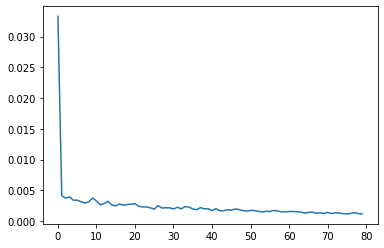

In [20]:
loss = model.history.history['loss']
plt.plot(loss)


In [21]:
data_test = pd.read_csv("/content/testset.csv")

In [22]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [23]:
data_test.shape

(125, 7)

In [24]:
real_stock_price = data_test.iloc[:,1:2].values
data_total = pd.concat((data_train['Open'],data_test['Open']),axis = 0)
data_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [25]:
inputs = data_total[len(data_total) - len(data_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [26]:
inputs.shape

(185,)

In [27]:
inputs = inputs.reshape(-1,1)

In [28]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [29]:
inputs = scaler.transform(inputs)


In [30]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [31]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [32]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [33]:
predicted_price = model.predict(x_test)

In [34]:
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

array([[1058.265 ],
       [1055.7517],
       [1055.4072],
       [1059.2532],
       [1066.5328],
       [1075.5785],
       [1084.7946],
       [1091.464 ],
       [1095.7968],
       [1097.959 ],
       [1101.297 ],
       [1105.4869],
       [1110.0527],
       [1114.2357],
       [1118.035 ],
       [1123.2446],
       [1130.9084],
       [1139.0505],
       [1146.1573],
       [1151.5305],
       [1154.3113],
       [1155.2657],
       [1154.5939],
       [1149.5623],
       [1139.0087],
       [1120.617 ],
       [1103.1958],
       [1089.0477],
       [1076.0085],
       [1066.8763],
       [1062.0387],
       [1060.9005],
       [1064.6104],
       [1072.1465],
       [1080.9259],
       [1089.9247],
       [1098.484 ],
       [1105.1411],
       [1110.6484],
       [1116.1804],
       [1119.7296],
       [1119.6252],
       [1112.0043],
       [1101.3356],
       [1093.5077],
       [1089.4264],
       [1090.6992],
       [1097.5835],
       [1109.7637],
       [1124.1771],


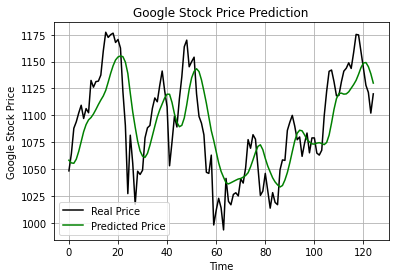

In [35]:
plt.plot(real_stock_price,color = 'black', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()

In [36]:
real_stock_price.shape,predicted_price.shape

((125, 1), (125, 1))